In [ ]:
# download sample hdf5 file
import urllib.request

download_path = 'sample.hdf5'
urllib.request.urlretrieve("https://g-66affc.7a577b.6fbd.data.globus.org/hdf5/20240508_043600_TAI.hdf5", download_path)

In [12]:
# read hdf5 file
import h5py
import numpy as np

with h5py.File(download_path, "r") as f:
  # primary keys --> B
  print(f"Keys: {f.keys()}")
  # meta information
  print(f"Attributes:")
  for k, v in f.attrs.items():
    print(f"{k}: {v}")
  # data
  nf2_b = np.array(f['B'])
  Mm_per_pixel = f.attrs['Mm_per_pixel']

Keys: <KeysViewHDF5 ['B']>
Attributes:
INFO: Magnetic vector field (B_x, B_y, B_z): (601, 257, 112, 3) (x, y, z, 3)
Mm_per_pixel: 0.72
time: 2024-05-08T04:34:42
type: cartesian
wcs: WCSAXES =                    2 / Number of coordinate axes                      CRPIX1  =                601.5 / Pixel coordinate of reference point            CRPIX2  =                257.0 / Pixel coordinate of reference point            CDELT1  =         0.0299999993 / [deg] Coordinate increment at reference point  CDELT2  =         0.0299999993 / [deg] Coordinate increment at reference point  CUNIT1  = 'deg'                / Units of coordinate increment and value        CUNIT2  = 'deg'                / Units of coordinate increment and value        CTYPE1  = 'CRLN-CEA'           / Coordinate type codecylindrical equal area projCTYPE2  = 'CRLT-CEA'           / Coordinate type codecylindrical equal area projCRVAL1  =           346.510803 / [deg] Coordinate value at reference point      CRVAL2  =         

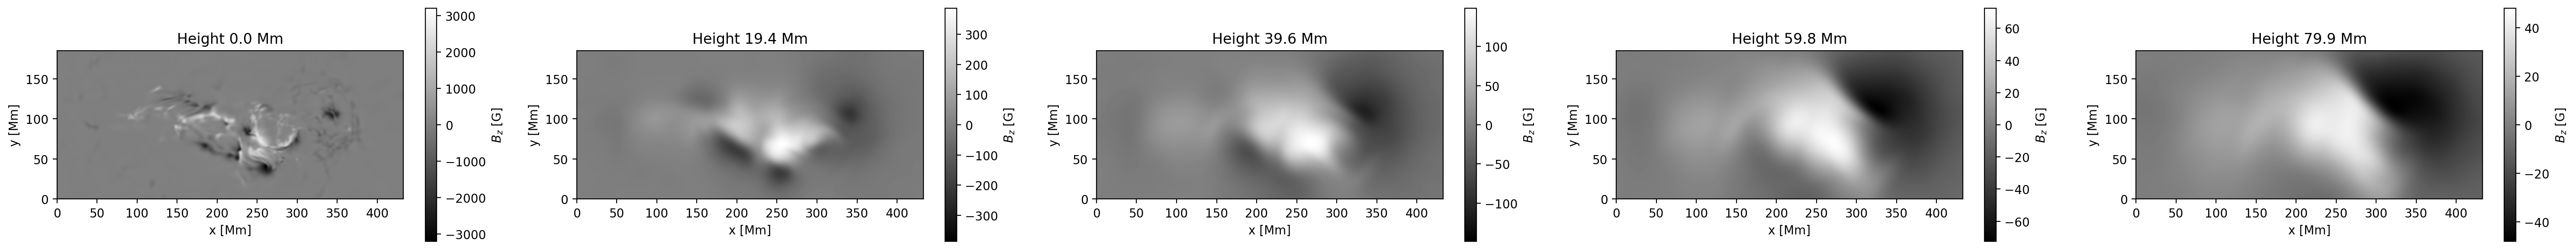

In [27]:
from matplotlib import pyplot as plt

# select 5 slices across the height of the frame
height_idx = np.linspace(0, nf2_b.shape[2] - 1, 5, dtype=int)
nf2_heights = height_idx * Mm_per_pixel

# setup scale of frame
extent = [0, nf2_b.shape[0] * Mm_per_pixel, 0, nf2_b.shape[1] * Mm_per_pixel]

# plot slices
fig, axs = plt.subplots(1, 5, figsize=(30, 3), dpi=200)

for i, ax in enumerate(axs):
    idx = height_idx[i]
    h = nf2_heights[i]
    b_slice = nf2_b[:, :, idx, 2]
    # plot B_z
    v_min_max = np.max(np.abs(b_slice))
    im = ax.imshow(nf2_b[:, :, idx, 2].T, cmap='gray', vmin=-v_min_max, vmax=v_min_max, origin='lower', extent=extent)
    # add colorbar
    plt.colorbar(im, ax=ax, label='$B_z$ [G]')
    ax.set_xlabel("x [Mm]")
    ax.set_ylabel("y [Mm]")
    ax.set_title(f"Height {h:.1f} Mm")

plt.tight_layout()
plt.show()